In [1]:
import pandas as pd
import torch
import numpy as np
import os


In [21]:
i = 0
meta = pd.read_csv('q4_metadata.csv')
cases = []
for root, subdirs, f in os.walk('TCGA'):
    if f[0][-3:] == 'tsv':
        file_path = os.path.join(root, f[0])
        df = pd.read_csv(file_path,sep='\t',header=1)
        df = df[['gene_name','tpm_unstranded']]
        df = df.iloc[4:,]
        # df = df.reset_index(drop=True)
        df = df.set_index(df.columns[0])
        # df = df.reset_index(drop=True)
        df = df.T
        if i ==0:
            data = df
            project = meta[meta.filename==f[0]]['project_id'].values
            cases.append(meta[meta.filename==f[0]]['project_id'].values)
        else:
            project = meta[meta.filename==f[0]]['project_id'].values
            if project:
                data = pd.concat([data, df])
                cases.append(meta[meta.filename==f[0]]['project_id'].values)
            print(data.shape,project)
        i +=1 

(2, 60660) ['TCGA-LIHC']
(3, 60660) ['TCGA-COAD']
(4, 60660) ['TCGA-TGCT']
(5, 60660) ['TCGA-BRCA']
(6, 60660) ['TCGA-BRCA']
(7, 60660) ['TCGA-HNSC']
(8, 60660) ['TCGA-PRAD']
(9, 60660) ['TCGA-BRCA']
(10, 60660) ['TCGA-OV']
(11, 60660) ['TCGA-BRCA']
(12, 60660) ['TCGA-LUAD']
(12, 60660) []


/home/huan/anaconda3/envs/cuda116/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


(13, 60660) ['TCGA-KIRC']
(14, 60660) ['TCGA-LUAD']
(15, 60660) ['TCGA-MESO']
(16, 60660) ['TCGA-KIRC']
(17, 60660) ['TCGA-LUSC']
(18, 60660) ['TCGA-KIRP']
(19, 60660) ['TCGA-STAD']
(20, 60660) ['TCGA-KIRC']
(21, 60660) ['TCGA-THCA']
(22, 60660) ['TCGA-HNSC']
(23, 60660) ['TCGA-DLBC']
(24, 60660) ['TCGA-ACC']
(25, 60660) ['TCGA-BRCA']
(26, 60660) ['TCGA-KIRC']
(27, 60660) ['TCGA-PRAD']
(28, 60660) ['TCGA-BRCA']
(29, 60660) ['TCGA-ESCA']
(30, 60660) ['TCGA-PCPG']
(31, 60660) ['TCGA-LUAD']
(32, 60660) ['TCGA-HNSC']
(33, 60660) ['TCGA-PRAD']
(34, 60660) ['TCGA-BRCA']
(35, 60660) ['TCGA-LUSC']
(36, 60660) ['TCGA-BRCA']
(37, 60660) ['TCGA-BRCA']
(38, 60660) ['TCGA-HNSC']
(39, 60660) ['TCGA-PRAD']
(40, 60660) ['TCGA-CESC']
(41, 60660) ['TCGA-SARC']
(42, 60660) ['TCGA-TGCT']
(43, 60660) ['TCGA-SARC']
(44, 60660) ['TCGA-HNSC']
(45, 60660) ['TCGA-SARC']
(46, 60660) ['TCGA-LUSC']
(47, 60660) ['TCGA-BRCA']
(48, 60660) ['CGCI-BLGSP']
(49, 60660) ['TCGA-PRAD']
(50, 60660) ['TCGA-SKCM']
(51, 60660) 

In [7]:
df = pd.read_csv(file_path,sep='\t',header=1)
df.head()

,gene_id,gene_name,gene_type,unstranded,stranded_first,stranded_second,tpm_unstranded,fpkm_unstranded,fpkm_uq_unstranded
0,N_unmapped,NaN,NaN,1782294,1782294,1782294,NaN,NaN,NaN
1,N_multimapping,NaN,NaN,5019543,5019543,5019543,NaN,NaN,NaN
2,N_noFeature,NaN,NaN,3252307,27136899,27333270,NaN,NaN,NaN
3,N_ambiguous,NaN,NaN,5500379,1315783,1309008,NaN,NaN,NaN
4,ENSG00000000003.15,TSPAN6,protein_coding,4746,2437,2309,79.4013,23.4272,21.9893


In [8]:
meta = pd.read_csv('q4_metadata.csv')
meta.head()

,Unnamed: 0,id,filename,case_id,project_id,sample_id,sample_type,disease_type,gender,race,ethnicity,vital_status
0,0,fa8437f1-e5a4-4aa9-a233-424dc3303880,511c5323-dad1-401c-bf3f-091c9e873c8c.rna_seq.a...,e802e579-5293-465c-a867-74e290268299,HCMI-CMDC,d002a9f5-d26c-4974-aa4d-6fdfbb77833a,Primary Tumor,Adenomas and Adenocarcinomas,male,black or african american,not hispanic or latino,Alive
1,1,b69c2c4b-59c7-46b8-8d79-4023081b5d45,388d5011-2e27-49b2-82da-0790335f65b9.rna_seq.a...,118bf677-caed-4f7f-a837-dd966dce5ca7,HCMI-CMDC,0ca75f2e-b1e8-4f74-acda-7e390d133064,Primary Tumor,Adenomas and Adenocarcinomas,female,white,not hispanic or latino,Alive
2,2,615819da-be2d-445c-b12f-4a45114b5019,f9dc15a6-aa0c-407c-a56c-53fdef03e865.rna_seq.a...,5739bcf8-92f0-406a-b4ee-45b6b989bdb5,HCMI-CMDC,95f45522-7b9a-447f-b4bb-d89bbb538a54,Primary Tumor,Adenomas and Adenocarcinomas,female,not reported,not reported,Alive
3,3,0e95c8a8-8bc3-4016-be71-acdc9411a369,24ee1455-865e-4bf0-a7ce-de2d0de3465f.rna_seq.a...,67e3c17e-e524-4681-8162-99742c802256,HCMI-CMDC,bd8cc933-1318-4aa9-80e3-c5bcd1cd9fd7,Primary Tumor,Adenomas and Adenocarcinomas,male,white,hispanic or latino,Unknown
4,4,900181c2-c3e5-47a9-920f-4cd4d8c86bc8,4997e83c-f389-4d66-8251-2ebea301d379.rna_seq.a...,fb50c60e-d191-474b-a5eb-19b922db6688,HCMI-CMDC,04efa31c-8ae1-4a38-bda5-8e9162bb9e61,Primary Tumor,Ductal and Lobular Neoplasms,female,not reported,not reported,Alive


In [9]:
f[0]

'c14446e4-1755-4b8d-a13d-1dfa816fa173.rna_seq.augmented_star_gene_counts.tsv'

In [16]:
y = meta[meta.filename=='e']['project_id'].values

In [18]:
if not y:
    print('s')

s


/home/huan/anaconda3/envs/cuda116/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """Entry point for launching an IPython kernel.


In [22]:
data.shape

(9205, 60660)

In [24]:
X= torch.load('preprocessed/X.pt')

In [25]:
data.index = np.arange(data.shape[0])
gg = data.columns.intersection(X.columns)
data2 = data[gg]

In [30]:
X

,LINC00115,SAMD11,NOC2L,KLHL17,PLEKHN1,HES4,ISG15,AGRN,TTLL10,TNFRSF18,...,ZFY,PCDH11Y,TBL1Y,USP9Y,DDX3Y,UTY,TMSB4Y,NLGN4Y,KDM5D,EIF1AY
Pat02,6.610000,4.240000,53.690000,16.920000,1.710000,12.030000,26.770000,65.870000,0.110000,3.620000,...,0.170000,0.000000,0.000000,0.640000,0.050000,0.270000,0.000000,0.050000,0.640000,0.000000
Pat03,3.770000,0.610000,65.960000,9.130000,19.900000,7.560000,7.630000,55.440000,0.290000,9.640000,...,0.010000,0.010000,0.000000,0.110000,0.600000,0.160000,0.000000,0.500000,0.260000,0.390000
Pat04,2.470000,0.570000,74.390000,17.760000,0.430000,2.110000,4.800000,78.980000,0.000000,1.080000,...,29.070000,0.040000,0.000000,64.730000,183.070000,88.470000,0.520000,80.300000,113.870000,43.810000
Pat06,8.790000,1.310000,51.070000,9.700000,1.670000,4.250000,108.540000,66.580000,0.240000,5.320000,...,23.080000,1.430000,0.030000,51.390000,86.410000,81.950000,0.270000,17.540000,134.460000,22.490000
Pat08,4.220000,0.630000,80.800000,6.470000,0.410000,1.440000,31.980000,119.160000,0.340000,2.400000,...,35.550000,0.020000,5.480000,60.220000,170.650000,76.590000,0.940000,6.620000,128.840000,35.840000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pt35,24.696013,0.092566,173.951860,23.641068,1.222484,51.348978,61.338430,129.635283,0.000000,2.169639,...,0.040482,0.016747,0.000000,0.008873,0.116784,0.004115,0.000000,0.000000,0.023272,0.055005
Pt37,14.947634,0.579756,92.229980,18.987374,2.734513,76.337669,16.336946,72.440187,0.000000,7.210402,...,0.018110,0.025358,0.000000,0.002646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pt38,9.856867,1.749638,56.245350,15.517608,0.296242,46.710147,108.126937,20.822694,0.115549,41.760645,...,0.078479,0.062436,0.000000,0.011468,0.113200,0.015955,0.872043,0.000000,0.000000,0.000000
Pt28,3.767220,0.053343,54.905231,14.052876,19.314726,11.836474,7.576500,22.728979,0.038165,33.639319,...,2.472853,0.002722,0.005760,0.449400,20.089079,0.607067,6.739827,0.070474,5.190131,11.770598


In [28]:
data2

gene_name,TSPAN6,TNMD,DPM1,SCYL3,FGR,CFH,FUCA2,GCLC,NFYA,NIPAL3,...,EGLN2,SRXN1,AGAP11,GTF2H5,NUDT3,MUSTN1,DOC2B,FAM106A,GRIN2B,SNURF
0,12.2208,0.7749,135.3093,20.9680,9.3368,23.3889,25.8533,25.5253,72.7497,19.9946,...,2.5912,0.0000,0.3185,30.6875,0.0825,0.0000,4.7349,0.0280,0.0198,1.0430
1,92.5942,0.0366,83.6270,13.1897,2.5550,242.5277,67.4218,11.2111,37.0434,2.9084,...,2.4892,0.1282,0.0175,11.2724,0.3055,0.1539,1.7133,0.0423,0.1219,0.0919
2,59.3624,0.4486,75.5209,8.2196,14.6184,24.4958,82.9818,14.0175,24.8452,18.7449,...,1.7794,0.0291,0.0000,8.7040,0.1115,0.0000,16.1782,0.4537,1.3407,0.2505
3,45.6908,1.0936,97.7568,4.3150,34.2202,26.0121,53.9948,14.5904,36.6789,8.4090,...,1.7555,0.0958,0.0262,15.4051,0.4076,0.1150,4.7210,0.9244,0.0234,0.6182
4,54.6471,0.5400,114.2748,7.9596,3.6963,6.0927,30.6816,7.9732,49.6106,4.3753,...,3.0055,0.0000,0.0545,10.0035,0.3347,0.0000,1.5710,0.0287,0.0122,0.1785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9200,15.7180,0.0000,96.8605,5.0143,2.9690,9.3012,38.9787,182.0121,33.6032,15.3747,...,0.2840,0.9980,0.0164,8.5641,0.4128,0.0719,12.5871,0.0099,0.0000,0.0000
9201,6.4729,2.4660,403.0795,12.7337,13.6321,22.3069,79.1241,16.3476,42.0996,24.5751,...,2.9160,0.1152,0.0315,6.9476,0.3971,0.0691,4.3559,0.0095,0.0125,1.0739
9202,24.6189,0.0620,95.0960,7.8530,1.4603,0.4470,93.7924,14.1147,47.0374,20.4215,...,2.0034,0.0362,0.1783,17.7115,0.1293,0.0000,0.5378,0.0000,0.0029,0.4670
9203,70.2154,0.1875,104.9998,6.8746,2.0046,2.1672,55.8428,13.4536,38.2287,13.0170,...,1.8941,0.3831,0.0000,15.5823,0.9923,0.0000,6.9157,0.0000,0.2990,0.5888


In [31]:
data2[X.columns]

gene_name,LINC00115,SAMD11,NOC2L,KLHL17,PLEKHN1,HES4,ISG15,AGRN,TTLL10,TNFRSF18,...,ZFY,PCDH11Y,TBL1Y,USP9Y,DDX3Y,UTY,TMSB4Y,NLGN4Y,KDM5D,EIF1AY
0,0.7444,1.0376,35.1944,3.6383,3.9654,6.7596,30.0132,19.4095,0.2554,14.3987,...,0.0074,0.0035,0.0000,0.0045,0.0071,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.5331,0.4271,21.2321,4.8577,0.2034,20.3852,28.0310,81.7999,0.0946,1.6147,...,8.0470,0.0000,3.0449,5.6602,29.3447,5.8407,1.8581,8.6018,16.7732,20.2440
2,1.2848,3.4026,70.1044,2.9843,1.9400,15.3326,95.1239,103.7000,0.2024,5.7884,...,7.1227,0.0315,0.0000,6.4188,34.0842,6.7959,13.2064,1.4819,13.5121,20.0979
3,0.9192,3.4425,129.2756,30.2470,1.4032,14.0045,718.5364,26.4521,0.1413,29.8441,...,4.6765,0.0553,0.2152,5.5357,36.0074,4.8998,4.0444,1.2403,18.0209,18.1754
4,1.1467,2.7444,61.1674,7.0656,3.8047,12.3822,80.4635,26.9410,0.0734,15.5124,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0177,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9200,0.1533,0.5925,34.8924,3.1592,5.4537,22.7466,69.3721,114.8557,0.0505,38.8656,...,0.6265,0.0000,0.1153,0.3489,4.4459,0.3404,0.0755,0.9576,1.1357,1.1790
9201,0.7738,2.0933,66.2606,10.6989,4.9782,53.3053,2480.1428,108.1279,0.1942,13.4404,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9202,0.9722,5.0847,75.4453,8.5222,5.9895,24.4599,117.7256,103.7826,0.7320,11.0096,...,0.0165,0.0000,0.0000,0.0000,0.0160,0.0000,0.0000,0.0000,0.0097,0.0000
9203,2.5213,30.7680,88.7581,17.0404,10.5441,65.4657,646.6220,102.6907,0.5191,32.5481,...,0.0000,0.0000,0.0000,0.0456,0.1451,0.0000,0.0000,0.0000,0.1316,0.1032


In [32]:
data = data2[X.columns]
torch.save(data,'tcga_x.pt')

In [34]:
cases = np.array(cases)
cases

array([['TCGA-BRCA'],
       ['TCGA-LIHC'],
       ['TCGA-COAD'],
       ...,
       ['TCGA-BRCA'],
       ['TCGA-UCEC'],
       ['TCGA-CESC']], dtype=object)

In [35]:
torch.save(cases,'tcga_y.pt')

In [1]:
count = {'TCGA-BRCA':112,	
'TCGA-KIRC':71, 'TCGA-LUAD':58
,'TCGA-THCA':58	
,'TCGA-PRAD':52		
,'TCGA-LUSC':51	
,'TCGA-LIHC':50	
,'TCGA-COAD':40
,'TCGA-HNSC':40	
,'TCGA-STAD':36	
,'TCGA-KIRP':32	
,'TCGA-KICH':25	
,'TCGA-UCEC':23	
,'TCGA-BLCA':19	
,'TCGA-ESCA':13	
,'REBC-THYR':11	
,'TCGA-READ':10	
,'TCGA-CHOL':9	
,'TCGA-PAAD':4	
,'TCGA-CESC':3	
,'TCGA-PCPG':3	
,'TCGA-SARC':2	
,'TCGA-THYM':2	
,'TCGA-SKCM':1	
}


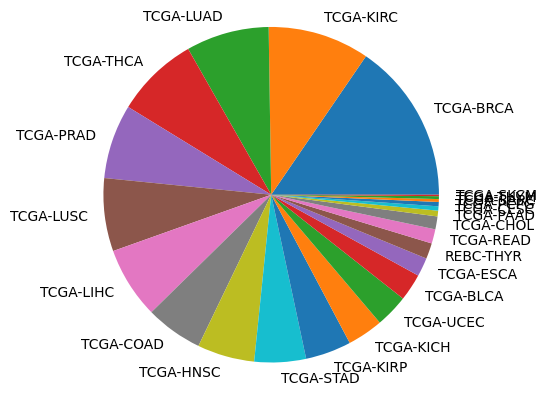

In [4]:
labels = []
sizes = []

for x, y in count.items():
    labels.append(x)
    sizes.append(y)
import matplotlib.pyplot as plt
# Plot
plt.pie(sizes, labels=labels)

plt.axis('equal')
plt.show()